# RiverCast

## Import Libraries and Dataset

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [2]:
# import dataset
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
df.head(10)

,Station,Year,Month,Day,Hour,Waterlevel,Station.1,Year.1,Month.1,Day.1,...,RF-Intensity.1,Humidity,Precipitation,Temperature,Temperature.1,Humidity.1,Precipitation.1,Temperature.2,Humidity.2,Precipitation.2
0,NANGKA,2012,January,1,1,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
1,NANGKA,2012,January,1,2,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
2,NANGKA,2012,January,1,3,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
3,NANGKA,2012,January,1,4,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
4,NANGKA,2012,January,1,5,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
5,NANGKA,2012,January,1,6,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
6,NANGKA,2012,January,1,7,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
7,NANGKA,2012,January,1,8,15.86,STO.NINO,2012,January,1,...,0.0,18.01,0.01,24.69,24.69,18.01,0.01,24.69,18.01,0.01
8,NANGKA,2012,January,1,9,15.86,STO.NINO,2012,January,1,...,0.0,17.64,0.01,26.20,26.20,17.64,0.01,26.20,17.64,0.01
9,NANGKA,2012,January,1,10,15.86,STO.NINO,2012,January,1,...,0.0,17.27,0.02,27.55,27.55,17.27,0.02,27.55,17.27,0.02


In [3]:
# remove non numeric fields
df = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3', 'RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
df = df.astype(np.float64)  # make sure that all data are float type
df.head(10)

,Waterlevel,Waterlevel.1,Waterlevel.2,Waterlevel.3,RF-Intensity,RF-Intensity.1,Temperature,Temperature.1,Temperature.2,Humidity,Humidity.1,Humidity.2,Precipitation,Precipitation.1,Precipitation.2
0,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
1,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
2,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
3,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
4,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
5,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
6,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
7,15.86,12.53,12.53,21.97,0.0,0.0,24.69,24.69,24.69,18.01,18.01,18.01,0.01,0.01,0.01
8,15.86,12.53,12.53,21.97,0.0,0.0,26.20,26.20,26.20,17.64,17.64,17.64,0.01,0.01,0.01
9,15.86,12.53,12.53,21.97,0.0,0.0,27.55,27.55,27.55,17.27,17.27,17.27,0.02,0.02,0.02


## Clean Dataset

### Remove Dataset Outliers

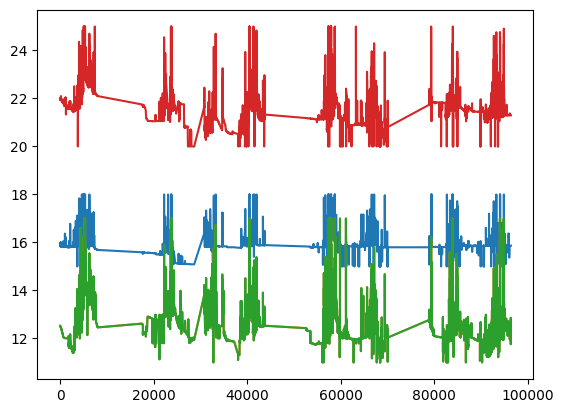

In [4]:
# remove water data outliers
df['Waterlevel'] = df['Waterlevel'].clip(upper=18, lower=15, axis=0)
df['Waterlevel.1'] = df['Waterlevel.1'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.2'] = df['Waterlevel.2'].clip(upper=17, lower=11, axis=0)
df['Waterlevel.3'] = df['Waterlevel.3'].clip(upper=25, lower=20, axis=0)

water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']]
plt.plot(water_data)

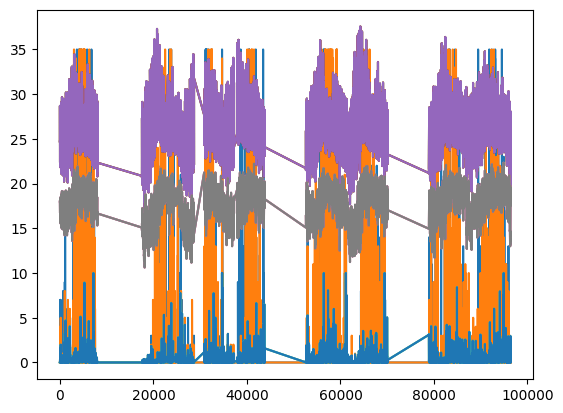

In [5]:
# remove weather data outliers
df['RF-Intensity'] = df['RF-Intensity'].clip(upper=35, lower=0, axis=0)
df['RF-Intensity.1'] = df['RF-Intensity.1'].clip(upper=35, lower=0, axis=0)
df[['Precipitation', 'Precipitation.1', 'Precipitation.2']] = df[['Precipitation', 'Precipitation.1', 'Precipitation.2']].clip(upper=10, lower=0, axis=0)

weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']]
plt.plot(weather_data)

In [6]:
# make time series stationary
df = df.diff()
df = df.drop(index=0)
df.shape

(59656, 15)

In [7]:
# drop all rows with zeros (no change at all)
df = df.loc[~(df==0).all(axis=1)]
df.shape

(59623, 15)

In [8]:
# smoothen time-series using moving average
df = df.rolling(window=48).mean()
df.dropna(inplace=True)
df.shape

(59576, 15)

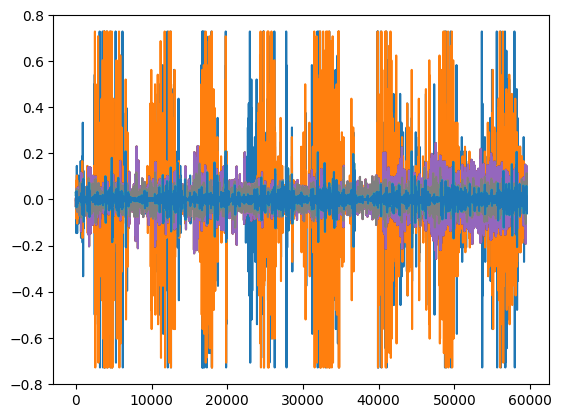

In [9]:
# plot weather data
weather_data = df[['RF-Intensity', 'RF-Intensity.1', 'Temperature', 'Temperature.1',  'Temperature.2', 'Humidity', 'Humidity.1', 'Humidity.2', 'Precipitation', 'Precipitation.1', 'Precipitation.2']].to_numpy()
plt.plot(weather_data)

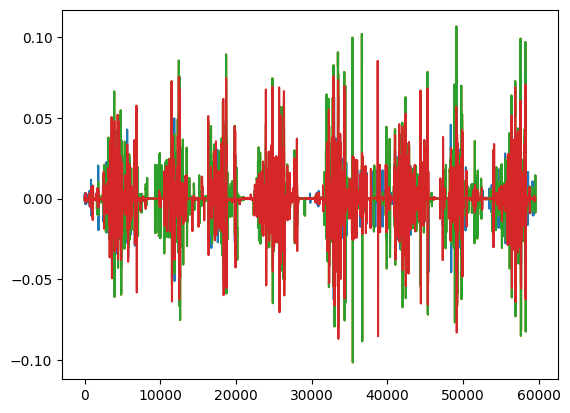

In [10]:
# plot water data
water_data = df[['Waterlevel', 'Waterlevel.1', 'Waterlevel.2', 'Waterlevel.3']].to_numpy()
plt.plot(water_data)

## Principal Component Analysis

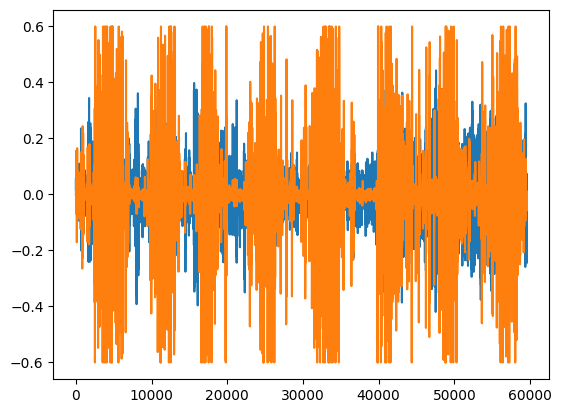

In [11]:
# compute covariance matrix
weather_cov_matrix = np.cov(weather_data, ddof=0, rowvar=False)

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(weather_cov_matrix)
order_of_importance = np.argsort(eigenvalues)[::-1] 

# sort eigenvalues and eigenvectors
sorted_eigenvalues = eigenvalues[order_of_importance].real
sorted_eigenvectors = eigenvectors[:,order_of_importance].real

k = 2  # number of features to preserve
weather_data = np.matmul(weather_data, sorted_eigenvectors[:,:k]) # transform the original data
weather_data = np.clip(weather_data, -0.6, 0.6)
plt.plot(weather_data)

## Normalized Dataset

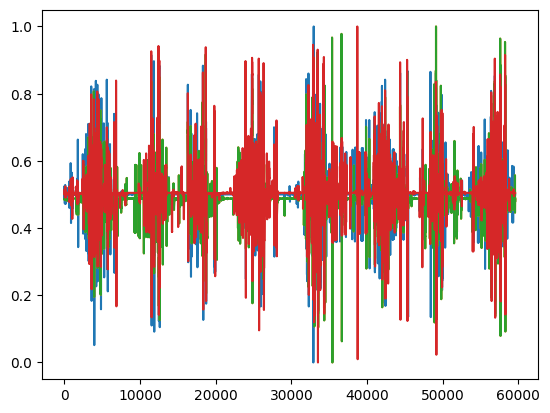

In [12]:
# normalize water data
water_scaler = MinMaxScaler()
water_data = water_scaler.fit_transform(water_data)
plt.plot(water_data)

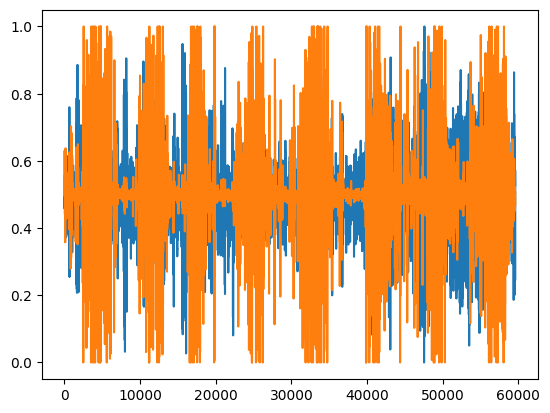

In [13]:
# normalize weather data
weather_scaler = MinMaxScaler()
weather_data = weather_scaler.fit_transform(weather_data)
plt.plot(weather_data)

## Prepare Training Batches

In [14]:
# utilize rolling window to generate dataset
MAX_TOKENS = 168
window_size = MAX_TOKENS + 1
window_step = 72
series_len = len(weather_data) - window_size

weather_windows = np.array([weather_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(weather_windows.shape)

water_windows = np.array([water_data[i:(i + window_size)] for i in range(0, series_len, window_step)])
print(water_windows.shape)

(826, 169, 2)
(826, 169, 4)


In [15]:
# training dataset
X1_train = np.array([arr[:MAX_TOKENS] for arr in weather_windows[:578]])
X2_train = np.array([arr[:-1] for arr in water_windows[:578]])
Y_train = np.array([arr[1:] for arr in water_windows[:578]])

print(X1_train.shape)
print(X2_train.shape)
print(Y_train.shape)

# validation dataset
X1_val = np.array([arr[:MAX_TOKENS] for arr in weather_windows[578:702]])
X2_val = np.array([arr[:-1] for arr in water_windows[578:702]])
Y_val = np.array([arr[1:] for arr in water_windows[578:702]])

print(X1_val.shape)
print(X2_val.shape)
print(Y_val.shape)

# testing dataset
X1_test = np.array([arr[:MAX_TOKENS] for arr in weather_windows[702:]])
X2_test = np.array([arr[:-1] for arr in water_windows[702:]])
Y_test = np.array([arr[1:] for arr in water_windows[702:]])

print(X1_test.shape)
print(X2_test.shape)
print(Y_test.shape)

(578, 168, 2)
(578, 168, 4)
(578, 168, 4)
(124, 168, 2)
(124, 168, 4)
(124, 168, 4)
(124, 168, 2)
(124, 168, 4)
(124, 168, 4)


## Build the Model

In [16]:
# Positional Encoding
def positional_encoding(length, depth):
    depth = depth / 2
    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
        [np.sin(angle_rads), np.cos(angle_rads)],
        axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)


class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super().__init__()
        self.d_model = d_model
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

    def call(self, x):
        length = tf.shape(x)[1]
        # This factor sets the relative scale of the positional encoding.
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[tf.newaxis, :length, :]
        return x

# layer test
pos_encoding = PositionalEmbedding(d_model=2)
encoding = pos_encoding(X1_test)
encoding.shape

TensorShape([124, 168, 2])

In [17]:
# Attention Layers

class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()
        
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

# layer test
cross_attn = CrossAttention(num_heads=1, key_dim=2, dropout=0.1)
attn_scores = cross_attn(X2_test, X1_test)
print(attn_scores.shape)
    
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
# layer test
global_attn = GlobalSelfAttention(num_heads=1, key_dim=2, dropout=0.1)
attn_scores = global_attn(X1_test)
print(attn_scores.shape)
    
class CausalSelfAttention(BaseAttention):
    def call(self, x):
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            use_causal_mask=True)
        
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x
    
# layer test
casual_attn = CausalSelfAttention(num_heads=1, key_dim=4, dropout=0.1)
attn_scores = casual_attn(X2_test)
print(attn_scores.shape)

(124, 168, 4)
(124, 168, 2)
(124, 168, 4)


In [18]:
# Feed Forward Layer

class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
            tf.keras.layers.Dense(dff, activation='tanh'),
            tf.keras.layers.Dense(d_model, activation='tanh'),
            tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
        x = self.layer_norm(x) 
        return x
    
# layer test
feed_forward = FeedForward(d_model=4, dff=512)
output = feed_forward(X2_test)
output.shape

TensorShape([124, 168, 4])

In [19]:
# Encoder Layer

class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.self_attention = GlobalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x
    
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, dff, d_model=2, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.enc_layer = EncoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
        x = self.dropout(x)
        x = self.enc_layer(x)
        return x  # Shape `(batch_size, seq_len, d_model)`.
    
# layer test
encoder = Encoder(dff=512)
output = encoder(X1_test)
output.shape

TensorShape([124, 168, 2])

In [20]:
# Decoder Layer

class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, *, d_model, dff, dropout_rate=0.1):
        super(DecoderLayer, self).__init__()
        self.causal_self_attention = CausalSelfAttention(
            num_heads=1,
            key_dim=d_model,
            dropout=dropout_rate)
        
        self.cross_attention = CrossAttention(
            num_heads=1,
            key_dim=3,
            dropout=dropout_rate)
        
        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)
        self.last_attn_scores = self.cross_attention.last_attn_scores  # Cache the last attention scores
        x = self.ffn(x)  
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, dff, d_model=4, dropout_rate=0.1):
        super(Decoder, self).__init__()
        self.d_model = d_model
        self.pos_embedding = PositionalEmbedding(d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layer = DecoderLayer(d_model=d_model, dff=dff, dropout_rate=dropout_rate)
        self.last_attn_scores = None

    def call(self, x, context):
        x = self.pos_embedding(x)
        x = self.dropout(x)
        x = self.dec_layer(x, context)
        self.last_attn_scores = self.dec_layer.last_attn_scores

        return x

# layer test
decoder = Decoder(dff=512)
output = decoder(X2_test, X1_test)
output.shape

TensorShape([124, 168, 4])

In [21]:
# Transformer Model

class Transformer(tf.keras.Model):
    def __init__(self, *, dff, target_output_size, dropout_rate=0.1):
        super().__init__()
        self.encoder = Encoder(dff=dff, dropout_rate=dropout_rate)
        self.decoder = Decoder(dff=dff, dropout_rate=dropout_rate)
        self.final_layer = tf.keras.layers.Dense(target_output_size, activation='sigmoid')

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context, x  = inputs
        
        context = self.encoder(context)

        x = self.decoder(x, context)  # (batch_size, target_len, d_model)

        # Final linear layer output.
        output = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

        try:
            # Drop the keras mask, so it doesn't scale the losses/metrics.
            # b/250038731
            del output._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return output
    
# test model
transformer = Transformer(dff=512, target_output_size=4)

output = transformer((X1_test, X2_test))
output.shape

TensorShape([124, 168, 4])

In [22]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_1 (Encoder)         multiple                  2594      
                                                                 
 decoder_1 (Decoder)         multiple                  4765      
                                                                 
 dense_10 (Dense)            multiple                  20        
                                                                 
Total params: 7379 (28.82 KB)
Trainable params: 7379 (28.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
import keras 

callback = keras.callbacks.EarlyStopping(monitor='val_mean_absolute_error', patience=3)

transformer.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[keras.metrics.MeanAbsoluteError()])

transformer.fit(x=(X1_train, X2_train), y=Y_train, batch_size=128, epochs=100, validation_data=((X1_val, X2_val), Y_val), callbacks=[callback])

Epoch 1/100
5/5 [==============================] - 8s 577ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - val_loss: 0.1245 - val_mean_absolute_error: 0.1245
Epoch 2/100
5/5 [==============================] - 2s 402ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - val_loss: 0.1013 - val_mean_absolute_error: 0.1013
Epoch 3/100
5/5 [==============================] - 2s 404ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - val_loss: 0.0840 - val_mean_absolute_error: 0.0840
Epoch 4/100
5/5 [==============================] - 2s 469ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - val_loss: 0.0675 - val_mean_absolute_error: 0.0675
Epoch 5/100
5/5 [==============================] - 2s 520ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - val_loss: 0.0518 - val_mean_absolute_error: 0.0518
Epoch 6/100
5/5 [==============================] - 2s 400ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - val_loss: 0.0446 - val_mean_absolute_error: 0.0446
Epoch 7/100
5/5 [=====

## Test the Model

In [24]:
# measure accuracy
from sklearn.metrics import mean_absolute_error

pred = transformer.predict((X1_test, X2_test), verbose=None)
mean_absolute_error(y_true=np.reshape(Y_test, (-1, 4)), y_pred=np.reshape(pred, (-1, 4)))

0.017846115091257723

In [31]:
def make_predictions(index):
    context = X1_test[index]
    target = X2_test[index][:72]
    print(context.shape)
    
    for i in range(MAX_TOKENS - 72):
        y_pred = transformer.predict(x=(np.array([context]), np.array([target])), verbose=None)
        target = np.vstack((target, np.array([y_pred[0][-1]])))
    
    print(target.shape)
    plt.plot(target)
    

(168, 2)
(168, 4)


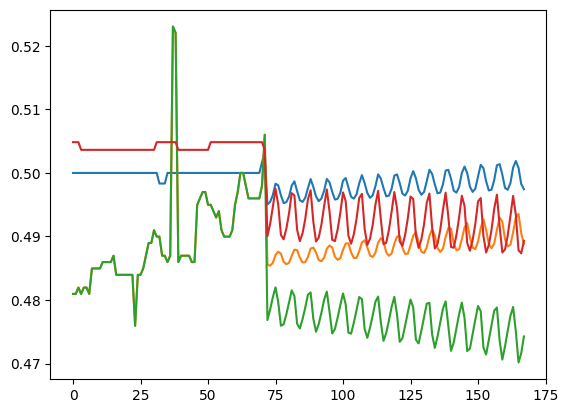

In [32]:
make_predictions(0)

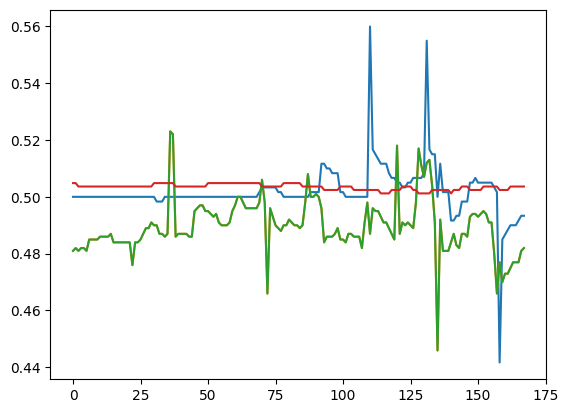

In [33]:
plt.plot(Y_test[0])

(168, 2)
(169, 4)


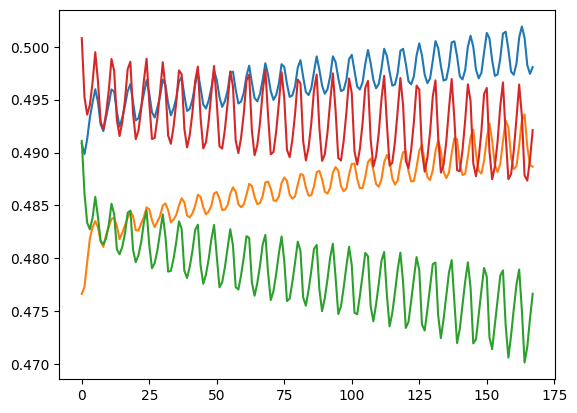

In [27]:
make_predictions(50)

(168, 2)
(169, 4)


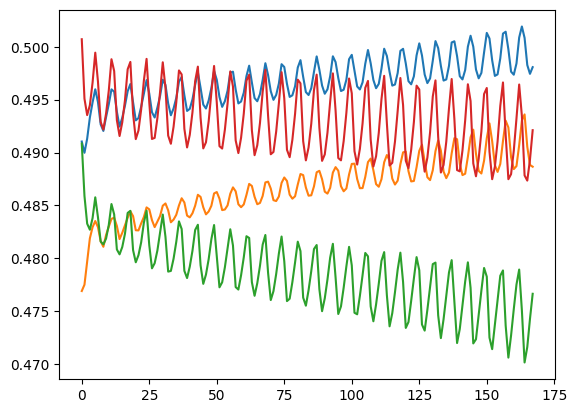

In [28]:
make_predictions(85)

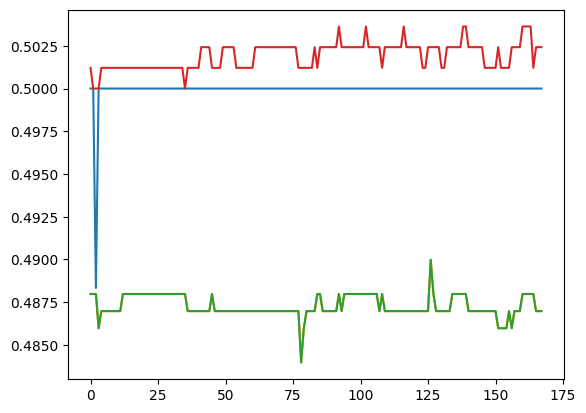

In [30]:
plt.plot(Y_test[50])